In [7]:
import pytesseract
import tesserocr
import cv2 as cv
from PIL import Image
import utils
import easyocr
from PIL import ImageDraw
import PIL
from tesserocr import PyTessBaseAPI, RIL
from matplotlib import pyplot as plt

img_path = 'screens/1080x2310/mainmenu.jpg'
# img_path = 'test_poszukiwania_funa.jpg'
# img_path = 'test_two_labels.jpg'

In [22]:
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_pil = Image.open(img_path)

## pyTesseract

In [9]:
%%timeit
pyTes1 = pytesseract.image_to_string(img)

621 ms ± 46.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
pyTes2 = pytesseract.image_to_string(img_pil)

503 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
pyTes1 = pytesseract.image_to_string(img)
print(pyTes1)

yey yes ye Le LE LE

tel
SaMouczek
Poszukivania Funs
Tryb Wyzwania
Osiggniecia
OpoJe

ae) 22 aT

Eyes ye ye Le Eg



## tesserOCR

In [12]:
%%timeit
ss = tesserocr.file_to_text(img_path)

415 ms ± 2.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
tt = tesserocr.image_to_text(img_pil)

425 ms ± 20.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
ss = tesserocr.file_to_text(img_path)
print(ss)

Eyes yes ye LLL

tele
SaMouczek
Poszukivania Funa
Saenger ETE]
Osiggniecia
OpoJe

ae) 22 aT

Eyes yy yey Le LE



In [15]:
print(tesserocr.get_languages())

('C:\\Users\\oookk\\anaconda3\\envs\\gameskanV/tessdata/', ['eng', 'osd'])


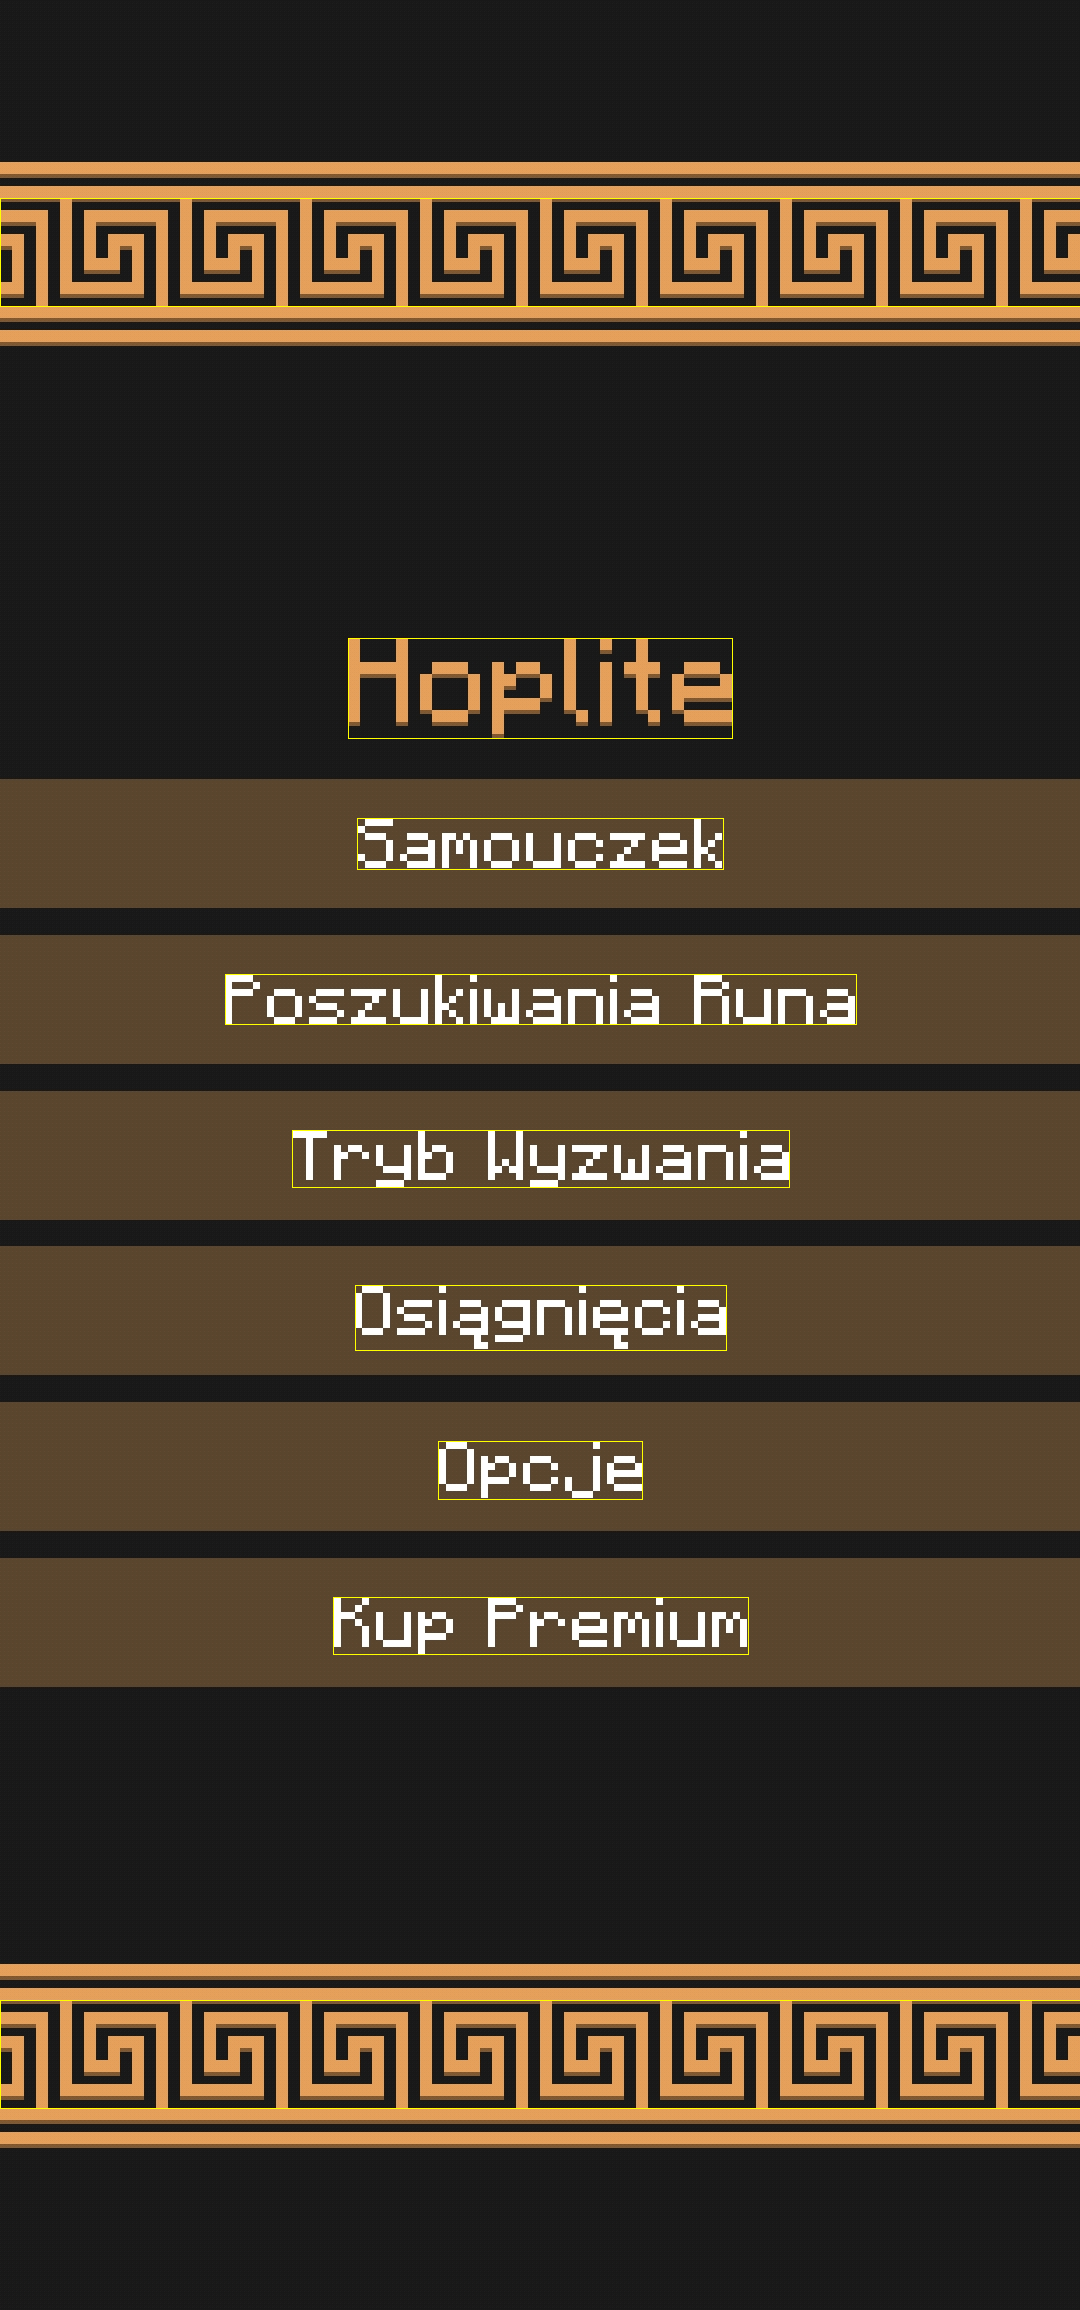

In [23]:
image = img_pil
draw = ImageDraw.Draw(image)
with PyTessBaseAPI() as api:
    api.SetImage(image)
    boxes = api.GetComponentImages(RIL.TEXTLINE, True)
    for i, (im, box, _, _) in enumerate(boxes):
        x, y = box['x'], box['y']
        w, h = box['w'], box['h']
        shape = [(x, y), (x+w, y+h)]
        draw.rectangle(shape, outline="yellow")
image

## easyOCR

In [17]:
reader = easyocr.Reader(['pl', 'en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [18]:
%%timeit
bounds = reader.readtext(img_path)

13.4 s ± 306 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
bounds = reader.readtext(img_path)
bounds

[([[335, 623], [745, 623], [745, 745], [335, 745]],
  'Hoplite',
  0.999529750735661),
 ([[351, 813], [733, 813], [733, 881], [351, 881]],
  'Samouczek',
  0.5560286387059311),
 ([[215, 966], [865, 966], [865, 1040], [215, 1040]],
  'Foszukiwania Runa',
  0.5104483041562299),
 ([[284, 1122], [798, 1122], [798, 1198], [284, 1198]],
  'Tryb Hyzwania',
  0.8277147127296985),
 ([[344, 1274], [735, 1274], [735, 1360], [344, 1360]],
  'Osiągniecia',
  0.5077712251585491),
 ([[428, 1431], [654, 1431], [654, 1516], [428, 1516]],
  'Opc_je',
  0.9540405806903519),
 ([[319, 1584], [759, 1584], [759, 1668], [319, 1668]],
  'Kup FreniuM',
  0.3857393425847584)]

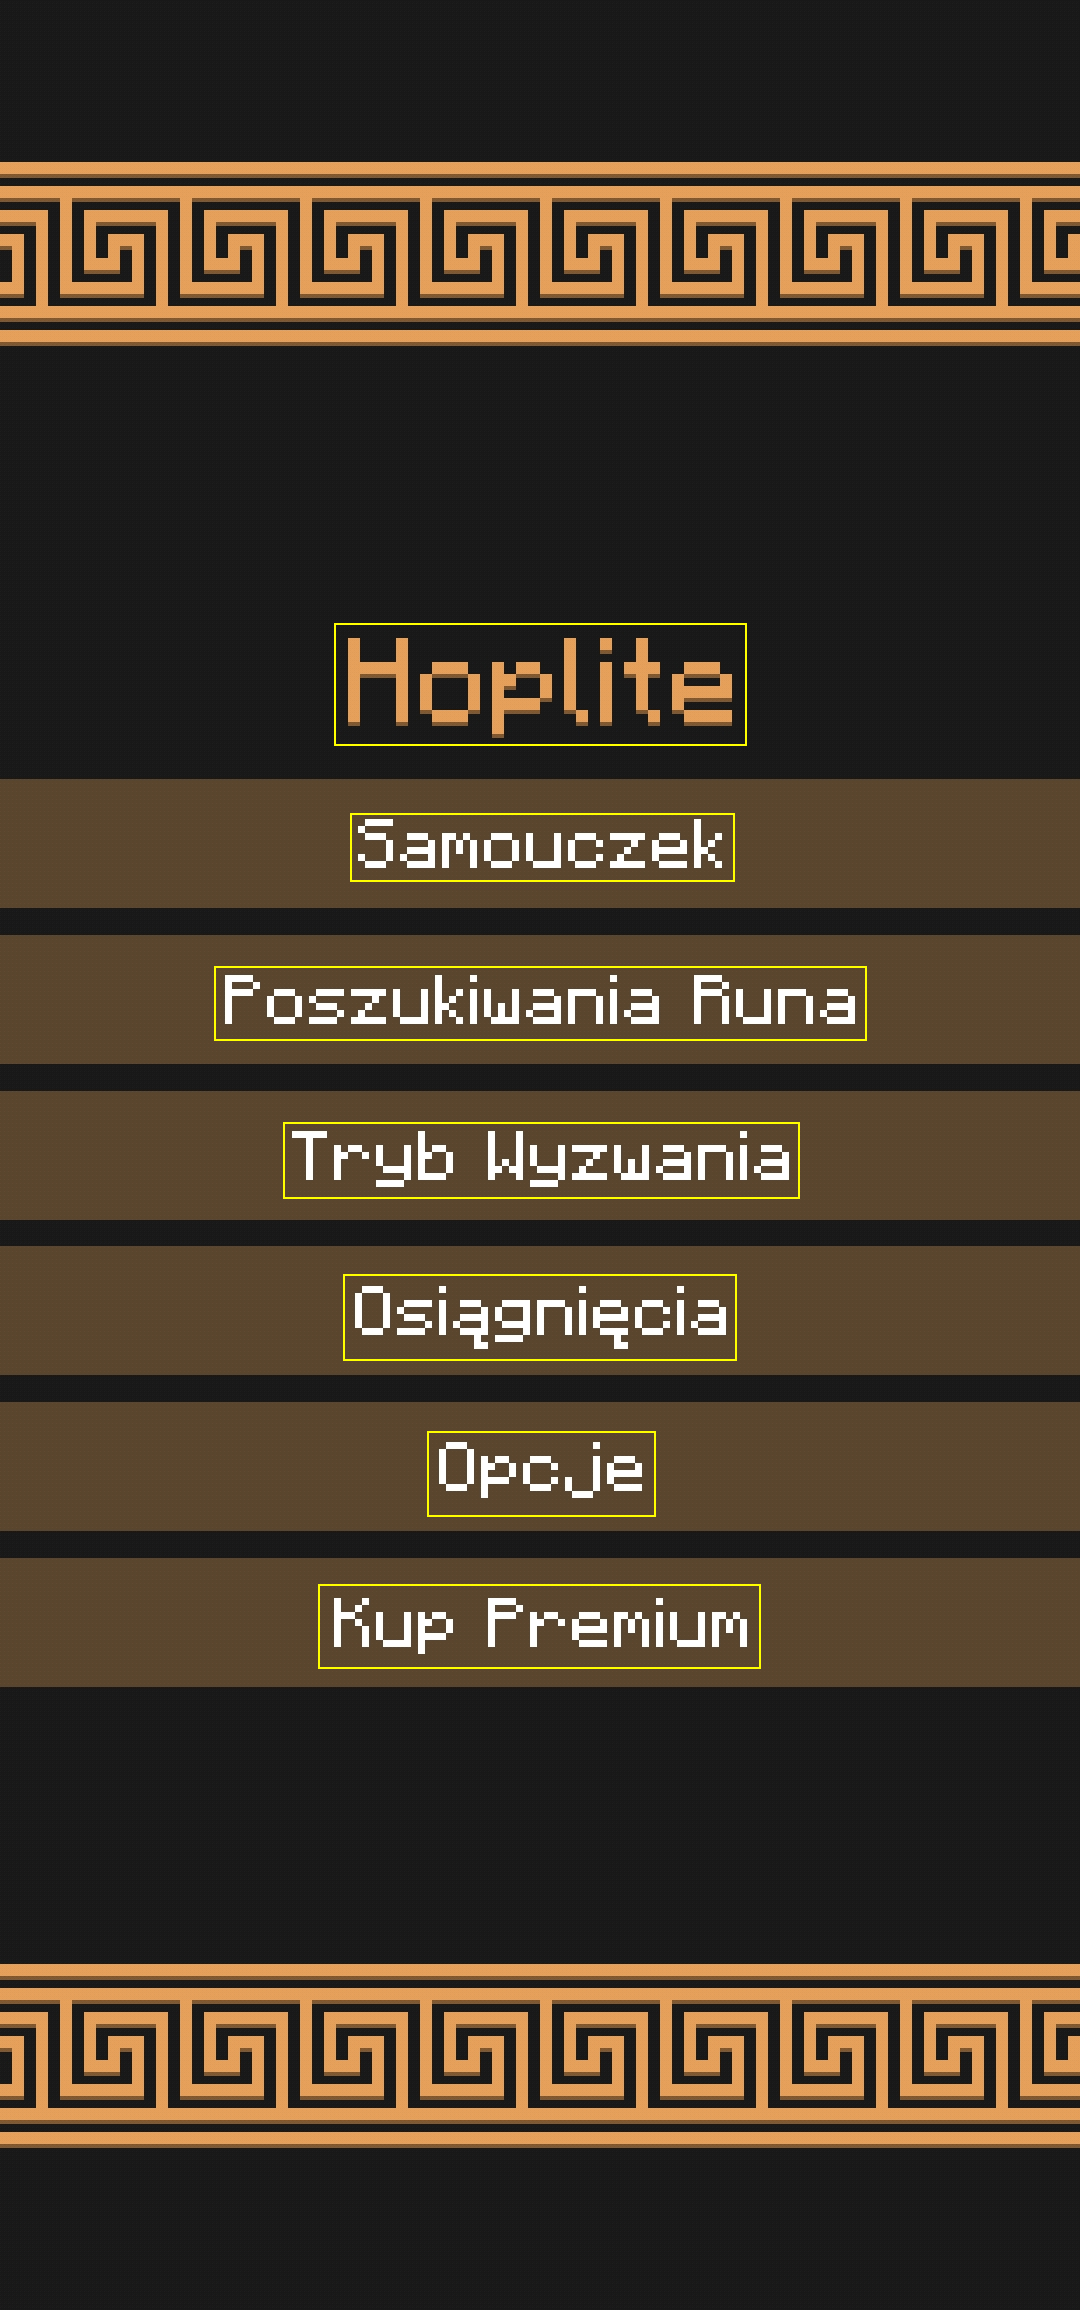

In [20]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

im = PIL.Image.open(img_path)
draw_boxes(im, bounds)